# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Func, Source, PlotType, Est)
from lib import (curve, stack, single_var)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m_vals = [1, 10, 50]

def agg_comparison(fbm, H):
    title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
    labels = [f"m={m}" for m in m_vals]
    params = [{"m": m} for m in m_vals]
    m_scan = Func.AGG.apply_parameter_scan(fbm, *params)
    stack(m_scan, ylim=[-3.5, 3.5], title=title, labels=labels)

## Simulation $H=0.8$

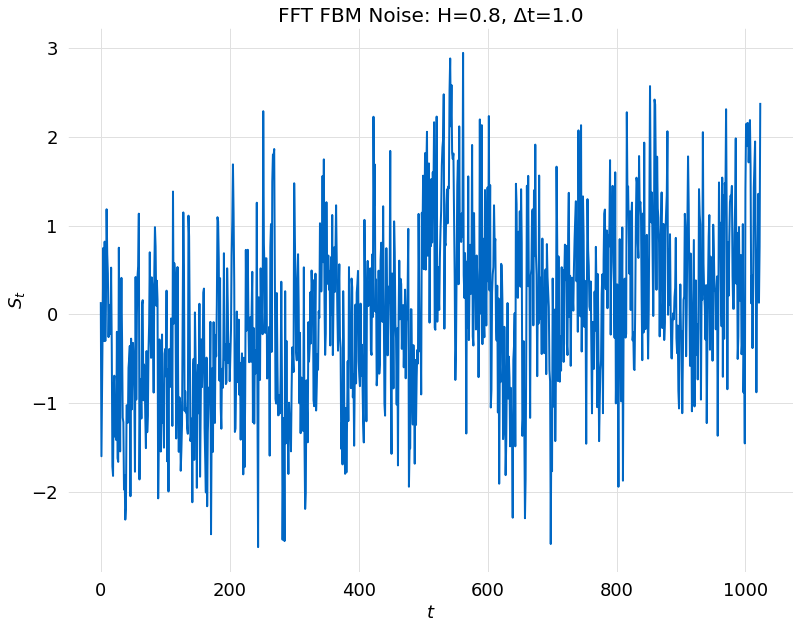

In [3]:
H = 0.8
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

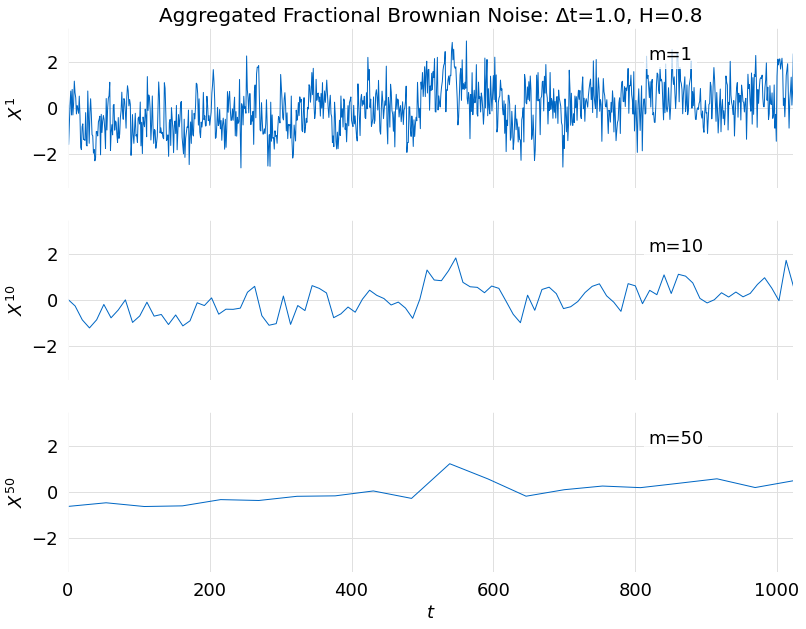

In [4]:
agg_comparison(fbm, H)

In [5]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-8397a210-46a6-49c4-a79f-6d6cd90d6800',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:28',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-1f7df1b7-0998-4c0e-aaf6-aed4da63ea3d',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [6]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6494.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.22e-91
Time:                        15:33:28   Log-Likelihood:                 219.59
No. Observations:                 100   AIC:                            -435.2
Df Residuals:                      98   BIC:                            -430.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.005      4.382      0.000       0.013       0.034
t             -0.3758      0.005    -80.584      0.000      -0.385      -0.367
==============================================================================
Omnibus:                       21.880   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.110
Skew:                           1.134   Prob(JB):                     7.87e-07
Kurtosis:                       4.266   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-8397a210-46a6-49c4-a79f-6d6cd90d6800',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:28',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-1f7df1b7-0998-4c0e-aaf6-aed4da63ea3d',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

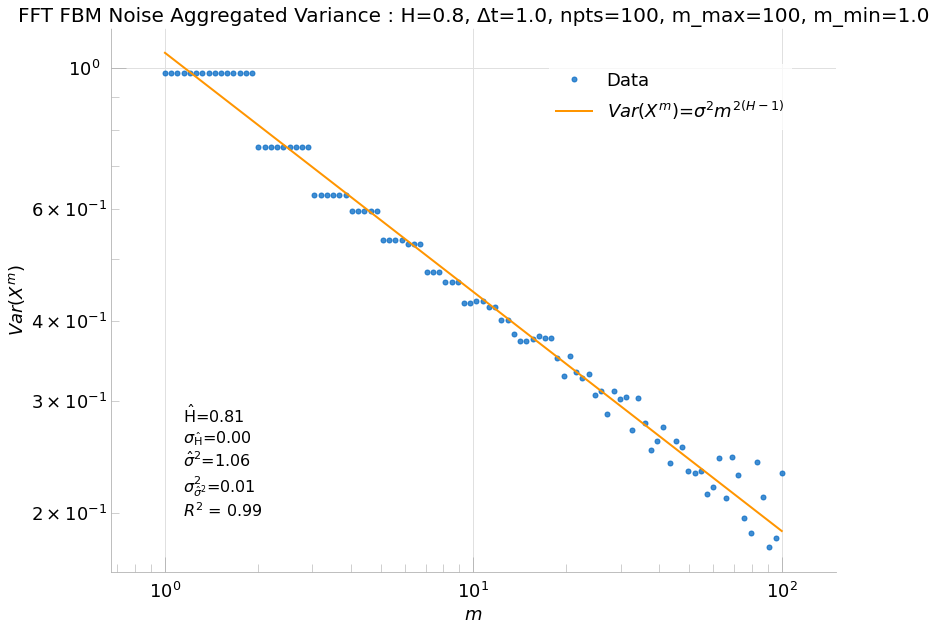

In [8]:
single_var(agg_var, est_type=Est.AGG_VAR)

## Simulation $H=0.6$

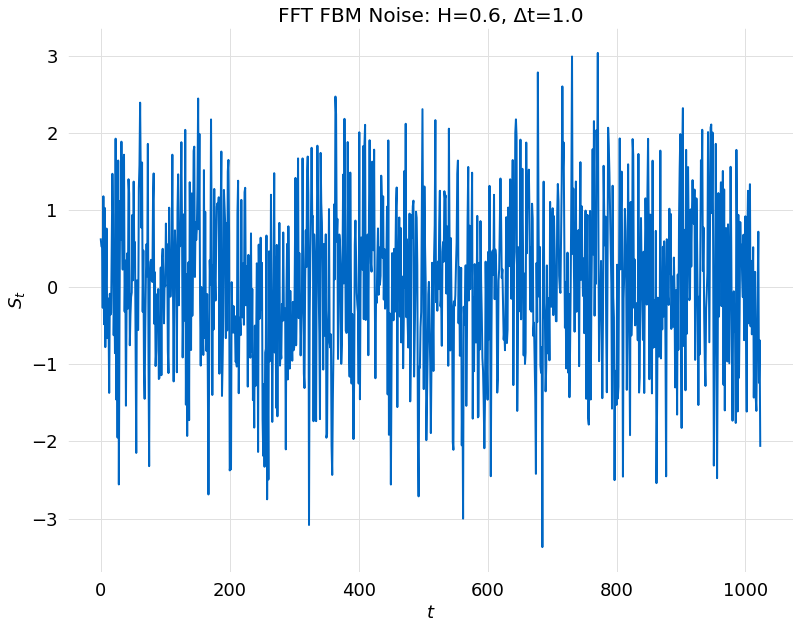

In [9]:
H = 0.6
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

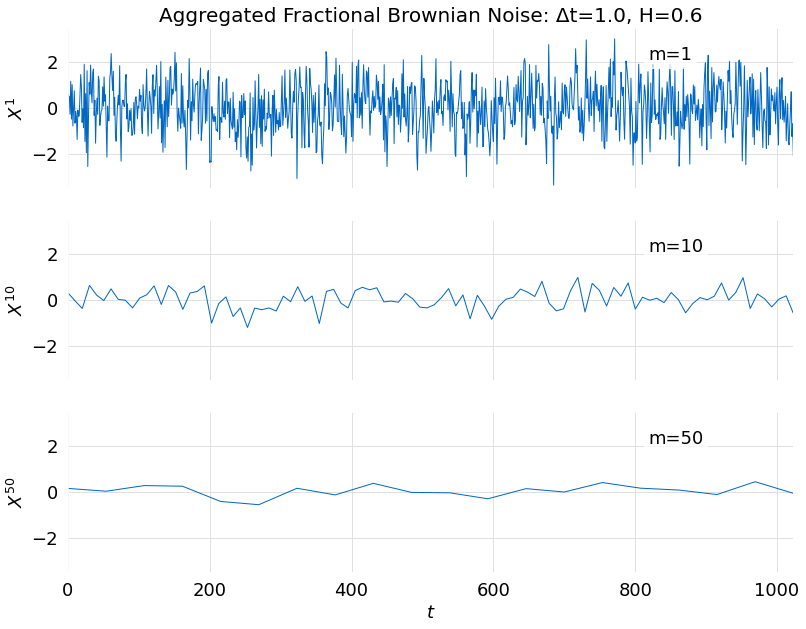

In [10]:
agg_comparison(fbm, H)

In [11]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-c4b24a56-e133-4b07-a425-d486dd0b037f',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:30',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-3c185c52-120a-4d65-88d7-45df01c4832d',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.6, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [12]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5882.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.63e-89
Time:                        15:33:30   Log-Likelihood:                 132.17
No. Observations:                 100   AIC:                            -260.3
Df Residuals:                      98   BIC:                            -255.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1551      0.013     11.985      0.000       0.129       0.181
t             -0.8573      0.011    -76.696      0.000      -0.879      -0.835
==============================================================================
Omnibus:                       26.467   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.434
Skew:                           0.763   Prob(JB):                     1.89e-21
Kurtosis:                       7.536   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-c4b24a56-e133-4b07-a425-d486dd0b037f',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:30',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-3c185c52-120a-4d65-88d7-45df01c4832d',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.6, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

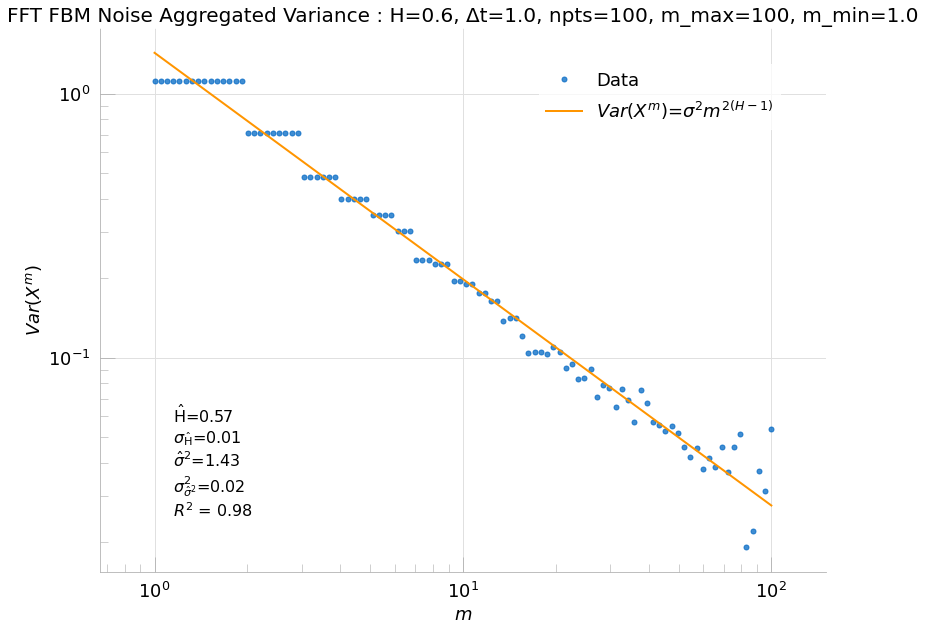

In [14]:
single_var(agg_var, est_type=Est.AGG_VAR)

## Simulation $H=0.4$

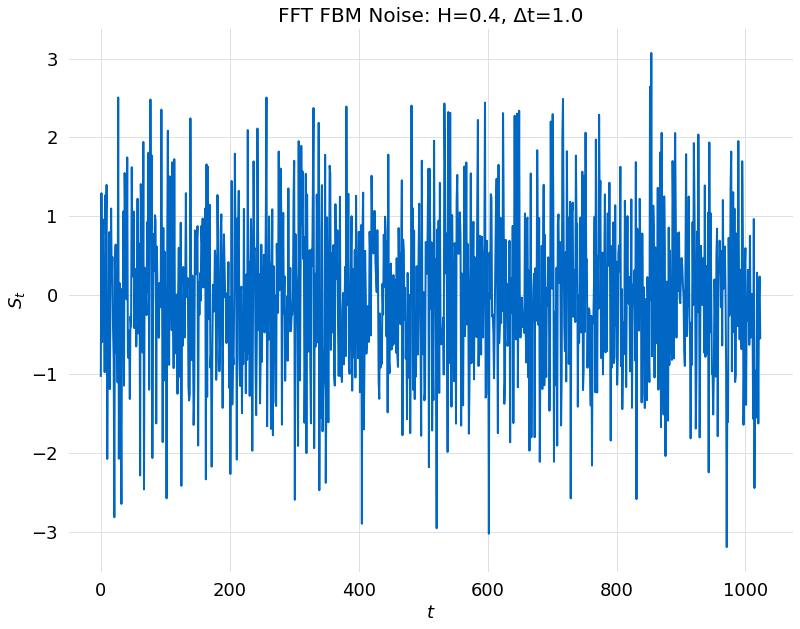

In [15]:
H = 0.4
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

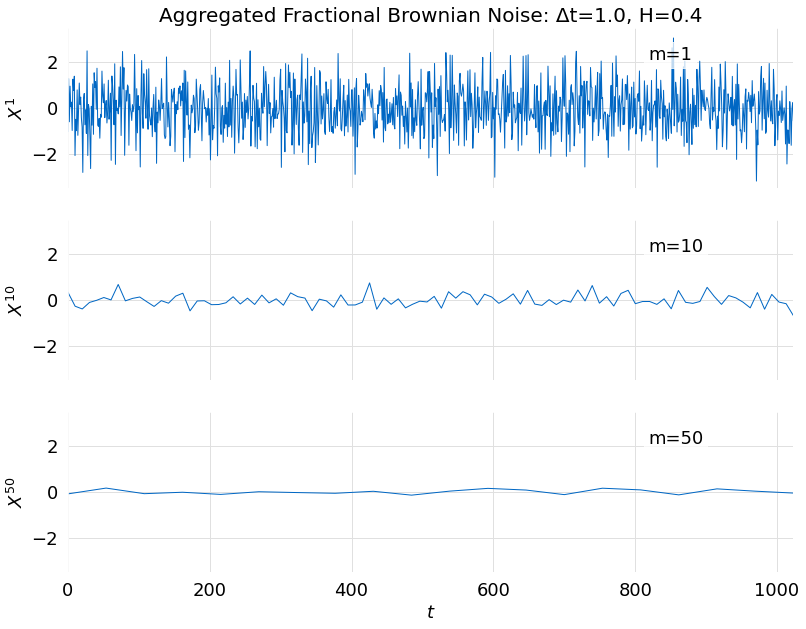

In [16]:
agg_comparison(fbm, H)

In [17]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-f76aef01-495b-4ed4-88da-4f7300c75b1e',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:32',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-e373ec53-f05f-422e-94fd-f7cf126732c2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.4, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [18]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8796.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           9.36e-98
Time:                        15:33:32   Log-Likelihood:                 109.03
No. Observations:                 100   AIC:                            -214.1
Df Residuals:                      98   BIC:                            -208.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1800      0.016     11.037      0.000       0.148       0.212
t             -1.3213      0.014    -93.789      0.000      -1.349      -1.293
==============================================================================
Omnibus:                        2.148   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.670
Skew:                           0.122   Prob(JB):                        0.434
Kurtosis:                       3.584   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-f76aef01-495b-4ed4-88da-4f7300c75b1e',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:32',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-e373ec53-f05f-422e-94fd-f7cf126732c2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.4, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

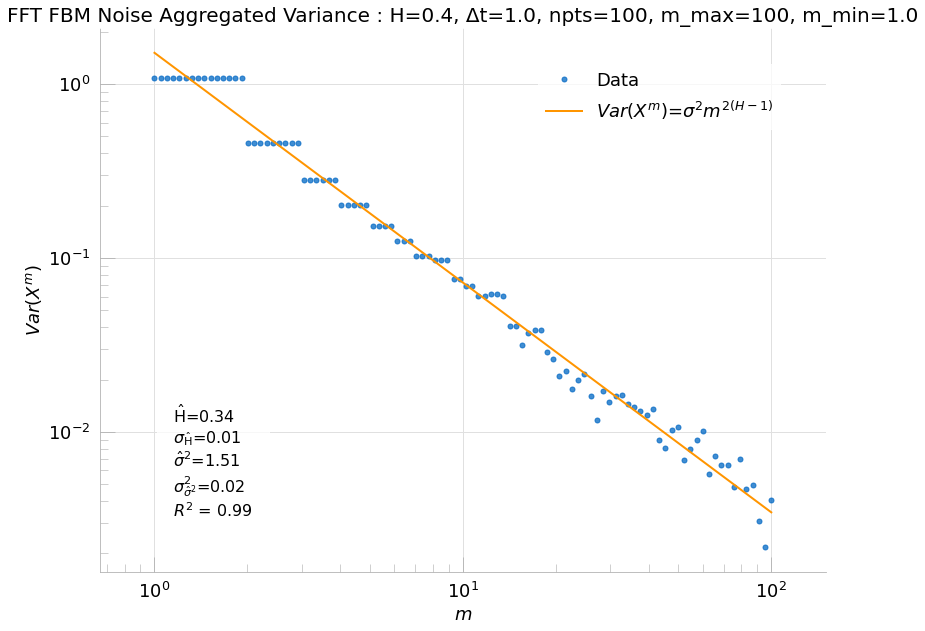

In [20]:
single_var(agg_var, est_type=Est.AGG_VAR)

## Simulation $H=0.2$

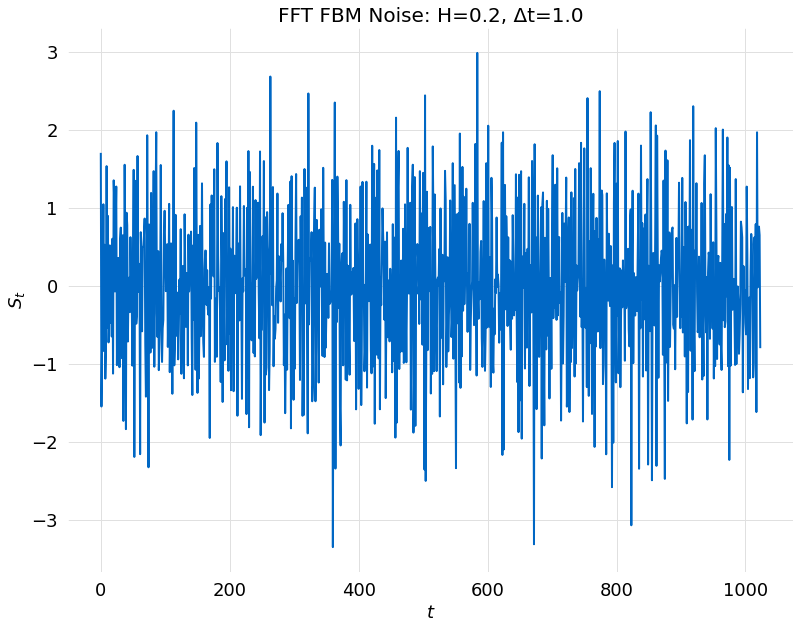

In [21]:
H = 0.2
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

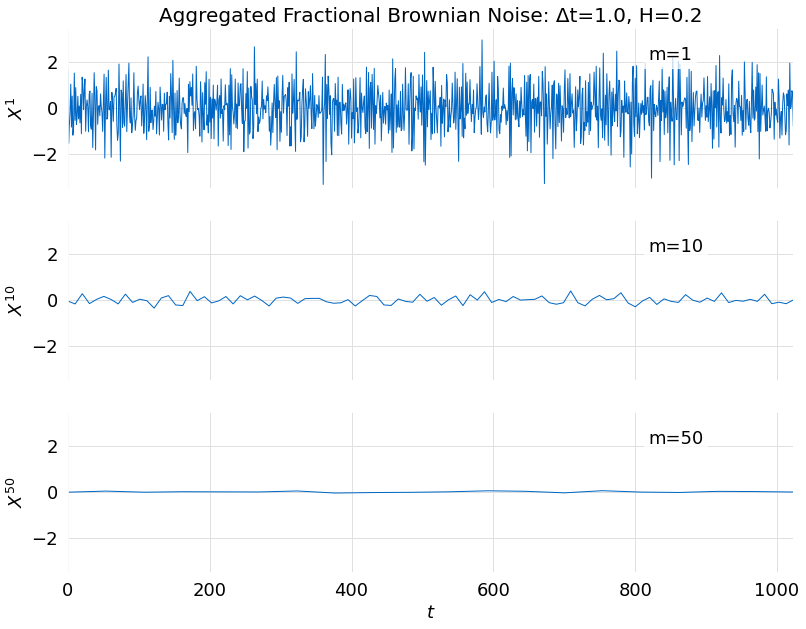

In [22]:
agg_comparison(fbm, H)

In [23]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-aabbfd3a-5bce-4017-ba49-73ccbad93e68',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:34',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-542ef50b-fd18-4206-80e1-c4129f2e0fb2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.2, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [24]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5813.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           4.64e-89
Time:                        15:33:34   Log-Likelihood:                 65.386
No. Observations:                 100   AIC:                            -126.8
Df Residuals:                      98   BIC:                            -121.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1357      0.025      5.377      0.000       0.086       0.186
t             -1.6619      0.022    -76.245      0.000      -1.705      -1.619
==============================================================================
Omnibus:                        6.723   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.035   Jarque-Bera (JB):               11.188
Skew:                          -0.131   Prob(JB):                      0.00372
Kurtosis:                       4.617   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-aabbfd3a-5bce-4017-ba49-73ccbad93e68',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '15/06/2022 15:33:34',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-542ef50b-fd18-4206-80e1-c4129f2e0fb2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.2, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

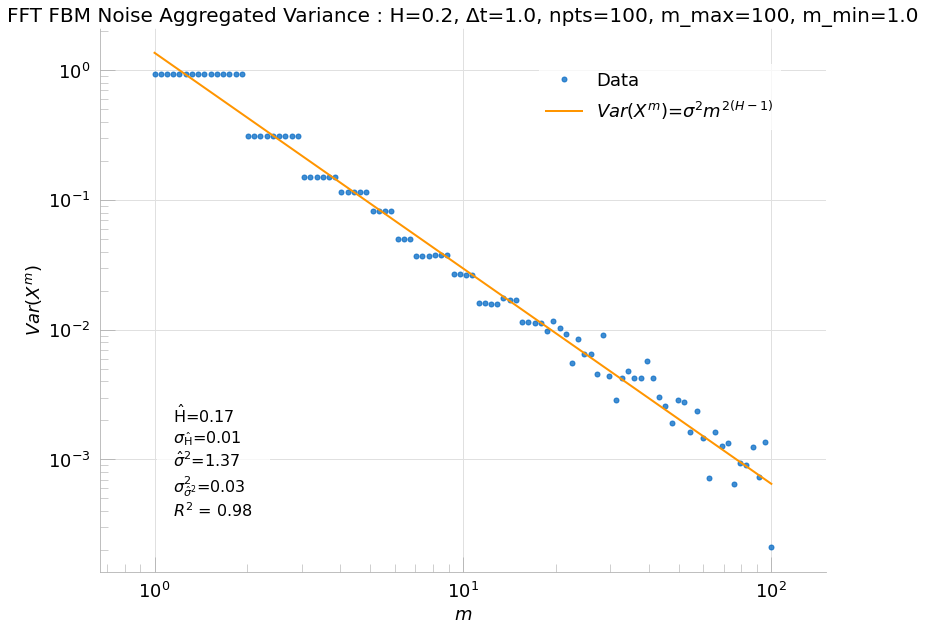

In [26]:
single_var(agg_var, est_type=Est.AGG_VAR)